<div style="text-align: center; background-color: #8ABEB9; padding: 10px;">
    <h2 style="font-weight: bold;">2020 DATATHON EPA AIR QUALITY</h2>
</div>

<div style="text-align: center; background-color: #8ABEB9; padding: 10px;">
    <h2 style="font-weight: bold;">IMPORTING VARIOUS MODULES</h2>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
plt.rcParams['figure.figsize']=[15,8]
from matplotlib.colors import ListedColormap
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

<div style="text-align: center; background-color: #8ABEB9; padding: 10px;">
    <h2 style="font-weight: bold;">LOADING DATASET</h2>
</div>

In [2]:
df = pd.read_excel('/kaggle/input/phase-ii-widsdatathon2022/epa/epa/Datathon_EPA_Air_Quality_Demographics_Meteorology_2020.xlsx')

In [3]:
df.head()

,AQS_ID,LATITUDE,LONGITUDE,COUNTY,STATE,CBSA,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,...,RELATIVE_HUMIDITY,WIND_SPEED_METERS_PER_SECOND,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC
0,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,NaN,NaN,NaN,5.2,0.051,NaN,NaN,NaN,NaN,NaN
1,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,NaN,NaN,NaN,3.0,0.035,NaN,NaN,NaN,NaN,NaN
2,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,NaN,NaN,NaN,6.5,0.041,NaN,NaN,NaN,NaN,NaN
3,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,NaN,NaN,NaN,6.7,0.045,NaN,NaN,NaN,NaN,NaN
4,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,NaN,NaN,NaN,4.8,0.033,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,AQS_ID,LATITUDE,LONGITUDE,COUNTY,STATE,CBSA,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,...,RELATIVE_HUMIDITY,WIND_SPEED_METERS_PER_SECOND,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC
133413,72-021-0010,18.420089,-66.150615,Bayamon,Puerto Rico,"San Juan-Carolina-Caguas, PR",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16.4,0.022,NaN,0.450000,0.295833,NaN,NaN
133414,72-021-0010,18.420089,-66.150615,Bayamon,Puerto Rico,"San Juan-Carolina-Caguas, PR",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.5,0.017,NaN,0.345833,0.125000,NaN,NaN
133415,72-021-0010,18.420089,-66.150615,Bayamon,Puerto Rico,"San Juan-Carolina-Caguas, PR",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,0.025,NaN,0.500000,0.250000,NaN,NaN
133416,72-021-0010,18.420089,-66.150615,Bayamon,Puerto Rico,"San Juan-Carolina-Caguas, PR",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.9,0.020,NaN,0.500000,NaN,NaN,NaN
133417,72-021-0010,18.420089,-66.150615,Bayamon,Puerto Rico,"San Juan-Carolina-Caguas, PR",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.8,0.019,NaN,NaN,0.933333,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133418 entries, 0 to 133417
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   AQS_ID                            133418 non-null  object        
 1   LATITUDE                          133418 non-null  float64       
 2   LONGITUDE                         133418 non-null  float64       
 3   COUNTY                            133418 non-null  object        
 4   STATE                             133418 non-null  object        
 5   CBSA                              121424 non-null  object        
 6   PEOPLE_OF_COLOR_FRACTION          133404 non-null  float64       
 7   LOW_INCOME_FRACTION               133404 non-null  float64       
 8   LINGUISTICALLY_ISOLATED_FRACTION  133404 non-null  float64       
 9   LESS_THAN_HS_ED_FRACTION          133404 non-null  float64       
 10  DATE                            

In [6]:
df.shape

(133418, 22)

## Summary Statistics of numeric variables:

In [7]:
df.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
LATITUDE,133418.0,38.4,18.42,35.24,38.99,41.5,64.85,4.75
LONGITUDE,133418.0,-96.29,-158.09,-112.19,-93.58,-80.4,-66.15,17.56
PEOPLE_OF_COLOR_FRACTION,133404.0,0.39,0.0,0.11,0.32,0.65,1.0,0.3
LOW_INCOME_FRACTION,133404.0,0.38,0.0,0.21,0.35,0.53,0.99,0.21
LINGUISTICALLY_ISOLATED_FRACTION,133404.0,0.05,0.0,0.0,0.01,0.06,0.68,0.09
LESS_THAN_HS_ED_FRACTION,133404.0,0.15,0.0,0.06,0.11,0.2,0.72,0.13
DATE,133418,2020-07-01 09:21:40.520169472,2020-01-01 00:00:00,2020-04-09 00:00:00,2020-07-02 00:00:00,2020-09-23 00:00:00,2020-12-30 00:00:00,NaN
TEMPERATURE_CELSIUS,71845.0,14.63,-36.02,7.87,15.35,22.59,42.59,9.98
RELATIVE_HUMIDITY,49413.0,60.33,3.54,46.75,63.08,75.33,100.11,19.75
WIND_SPEED_METERS_PER_SECOND,59659.0,2.15,0.02,1.2,1.8,2.71,15.39,1.41


In [8]:
df.describe(include="all").T.round(2)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
AQS_ID,133418,513,04-013-1004,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LATITUDE,133418.0,NaN,NaN,NaN,38.396963,18.420089,35.2401,38.986672,41.49511,64.84569,4.753737
LONGITUDE,133418.0,NaN,NaN,NaN,-96.290902,-158.088613,-112.19193,-93.579965,-80.395039,-66.150615,17.555206
COUNTY,133418,347,Clark,2696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STATE,133418,52,California,25009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBSA,121424,254,"San Francisco-Oakland-Hayward, CA",3188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PEOPLE_OF_COLOR_FRACTION,133404.0,NaN,NaN,NaN,0.387406,0.0,0.11,0.32,0.65,1.0,0.304613
LOW_INCOME_FRACTION,133404.0,NaN,NaN,NaN,0.376489,0.0,0.21,0.35,0.53,0.99,0.21497
LINGUISTICALLY_ISOLATED_FRACTION,133404.0,NaN,NaN,NaN,0.050916,0.0,0.0,0.01,0.06,0.68,0.094638
LESS_THAN_HS_ED_FRACTION,133404.0,NaN,NaN,NaN,0.146932,0.0,0.06,0.11,0.2,0.72,0.13083


In [9]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()                           
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['LATITUDE', 'LONGITUDE', 'PEOPLE_OF_COLOR_FRACTION', 'LOW_INCOME_FRACTION', 'LINGUISTICALLY_ISOLATED_FRACTION', 'LESS_THAN_HS_ED_FRACTION', 'TEMPERATURE_CELSIUS', 'RELATIVE_HUMIDITY', 'WIND_SPEED_METERS_PER_SECOND', 'WIND_DIRECTION', 'PM25_UG_PER_CUBIC_METER', 'OZONE_PPM', 'NO2_PPB', 'CO_PPM', 'SO2_PPB', 'LEAD_UG_PER_CUBIC_METER', 'BENZENE_PPBC']
Categorical variables: ['AQS_ID', 'COUNTY', 'STATE', 'CBSA']


In [10]:
# Count the number of categorical and numerical variables
categorical_count = df.select_dtypes(include='object').shape[1]
numerical_count = df.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 4
Number of numerical variables: 18


In [11]:
# Unique values for categorical features
print(df.select_dtypes(include=['object']).nunique())

AQS_ID    513
COUNTY    347
STATE      52
CBSA      254
dtype: int64


## Missing Value

In [12]:
missing_df =  df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
AQS_ID,0,0.00
LATITUDE,0,0.00
LONGITUDE,0,0.00
COUNTY,0,0.00
STATE,0,0.00
CBSA,11994,8.99
PEOPLE_OF_COLOR_FRACTION,14,0.01
LOW_INCOME_FRACTION,14,0.01
LINGUISTICALLY_ISOLATED_FRACTION,14,0.01
LESS_THAN_HS_ED_FRACTION,14,0.01


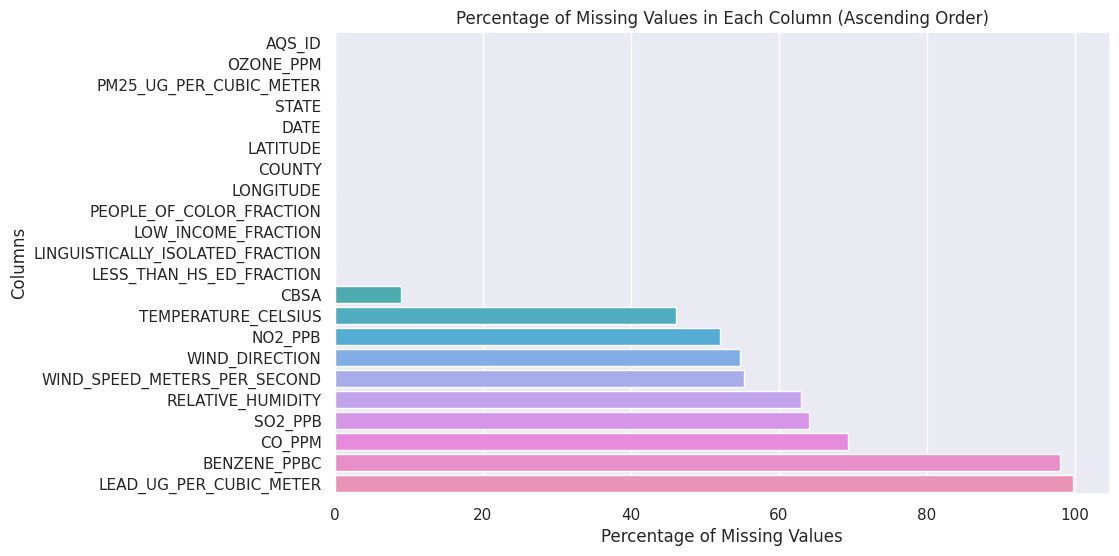

In [13]:
# Calculate the percentage of missing values for each column
missing_values_percentage = df.isnull().mean() * 100

# Now you can sort and visualize the missing values
missing_values_percentage_sorted = missing_values_percentage.sort_values()

# Visualization code
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_percentage_sorted, y=missing_values_percentage_sorted.index)
plt.title('Percentage of Missing Values in Each Column (Ascending Order)')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.show()

<Axes: >

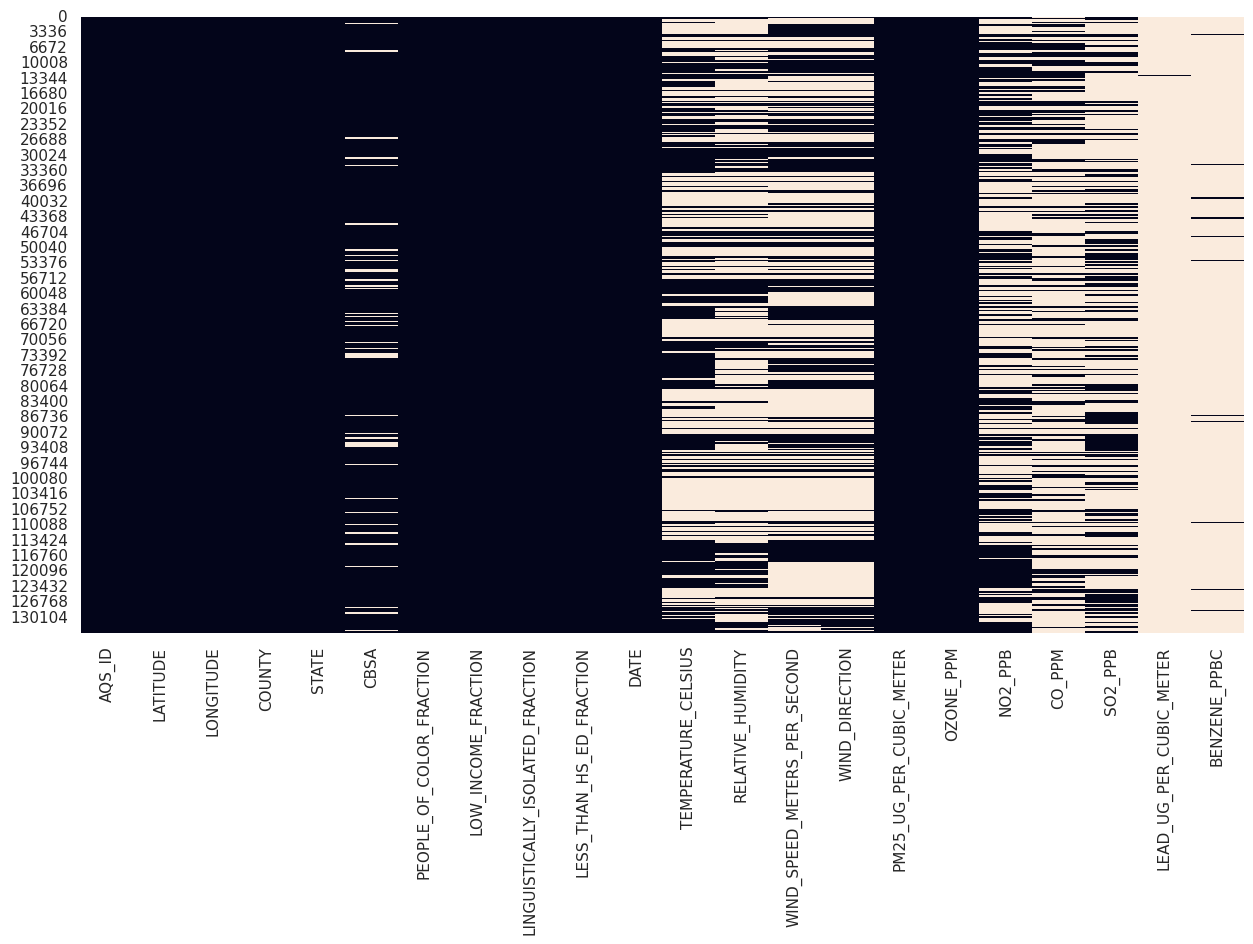

In [14]:
sns.heatmap(df.isnull(),cbar=False)

In [15]:
# Handling missing values
# Imputing missing values with the mean for continuous variables and mode for categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

# Checking for missing values before imputation
missing_values = df.isnull().sum()

# Rechecking for missing values after imputation
missing_values_after = df.isnull().sum()

(missing_values, missing_values_after)

(AQS_ID                              0
 LATITUDE                            0
 LONGITUDE                           0
 COUNTY                              0
 STATE                               0
 CBSA                                0
 PEOPLE_OF_COLOR_FRACTION            0
 LOW_INCOME_FRACTION                 0
 LINGUISTICALLY_ISOLATED_FRACTION    0
 LESS_THAN_HS_ED_FRACTION            0
 DATE                                0
 TEMPERATURE_CELSIUS                 0
 RELATIVE_HUMIDITY                   0
 WIND_SPEED_METERS_PER_SECOND        0
 WIND_DIRECTION                      0
 PM25_UG_PER_CUBIC_METER             0
 OZONE_PPM                           0
 NO2_PPB                             0
 CO_PPM                              0
 SO2_PPB                             0
 LEAD_UG_PER_CUBIC_METER             0
 BENZENE_PPBC                        0
 dtype: int64,
 AQS_ID                              0
 LATITUDE                            0
 LONGITUDE                           0
 COUNTY   

In [16]:
missing_df =  df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
AQS_ID,0,0.0
LATITUDE,0,0.0
LONGITUDE,0,0.0
COUNTY,0,0.0
STATE,0,0.0
CBSA,0,0.0
PEOPLE_OF_COLOR_FRACTION,0,0.0
LOW_INCOME_FRACTION,0,0.0
LINGUISTICALLY_ISOLATED_FRACTION,0,0.0
LESS_THAN_HS_ED_FRACTION,0,0.0


### Duplicate Value

In [17]:
df[df.duplicated(keep=False)]

,AQS_ID,LATITUDE,LONGITUDE,COUNTY,STATE,CBSA,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,...,RELATIVE_HUMIDITY,WIND_SPEED_METERS_PER_SECOND,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC


In [18]:
df.duplicated().sum()

0

In [19]:
# Drop duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(133418, 22)

In [21]:
# Get the list of categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Create a DataFrame containing counts of unique values for each categorical column
cat_df = pd.DataFrame(df[cat_cols].melt(var_name='column', value_name='value')
                      .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])

# Display summary statistics of categorical variables
display(df[cat_cols].describe())

# Display counts of unique values for each categorical column
display(cat_df)

,AQS_ID,COUNTY,STATE,CBSA
count,133418,133418,133418,133418
unique,513,347,52,254
top,04-013-1004,Clark,California,"San Francisco-Oakland-Hayward, CA"
freq,365,2696,25009,15182


count
column value              
AQS_ID 42-075-0100       7
       72-021-0010      14
       53-057-0011      17
       06-067-0012      19
       17-031-0076      21
...                    ...
STATE  Florida        4580
       Texas          4775
       Utah           5528
       Pennsylvania   9944
       California    25009

[1166 rows x 1 columns]

In [22]:
df.describe(include='O').T

,count,unique,top,freq
AQS_ID,133418,513,04-013-1004,365
COUNTY,133418,347,Clark,2696
STATE,133418,52,California,25009
CBSA,133418,254,"San Francisco-Oakland-Hayward, CA",15182


In [23]:
# Inspect useless features
df.nunique().sort_values()

LEAD_UG_PER_CUBIC_METER                26
LINGUISTICALLY_ISOLATED_FRACTION       39
STATE                                  52
LESS_THAN_HS_ED_FRACTION               60
LOW_INCOME_FRACTION                    90
PEOPLE_OF_COLOR_FRACTION              100
OZONE_PPM                             119
CBSA                                  254
COUNTY                                347
DATE                                  365
BENZENE_PPBC                          488
LATITUDE                              513
LONGITUDE                             513
AQS_ID                                513
PM25_UG_PER_CUBIC_METER              1035
SO2_PPB                              2825
WIND_SPEED_METERS_PER_SECOND         4875
RELATIVE_HUMIDITY                    6807
TEMPERATURE_CELSIUS                  9548
CO_PPM                              14609
NO2_PPB                             14829
WIND_DIRECTION                      18109
dtype: int64

<div style="text-align: center; background-color: #8ABEB9; padding: 10px;">
    <h2 style="font-weight: bold;">EXPLORATOTY DATA ANALYSIS</h2>
</div>

## Univariate Analysis

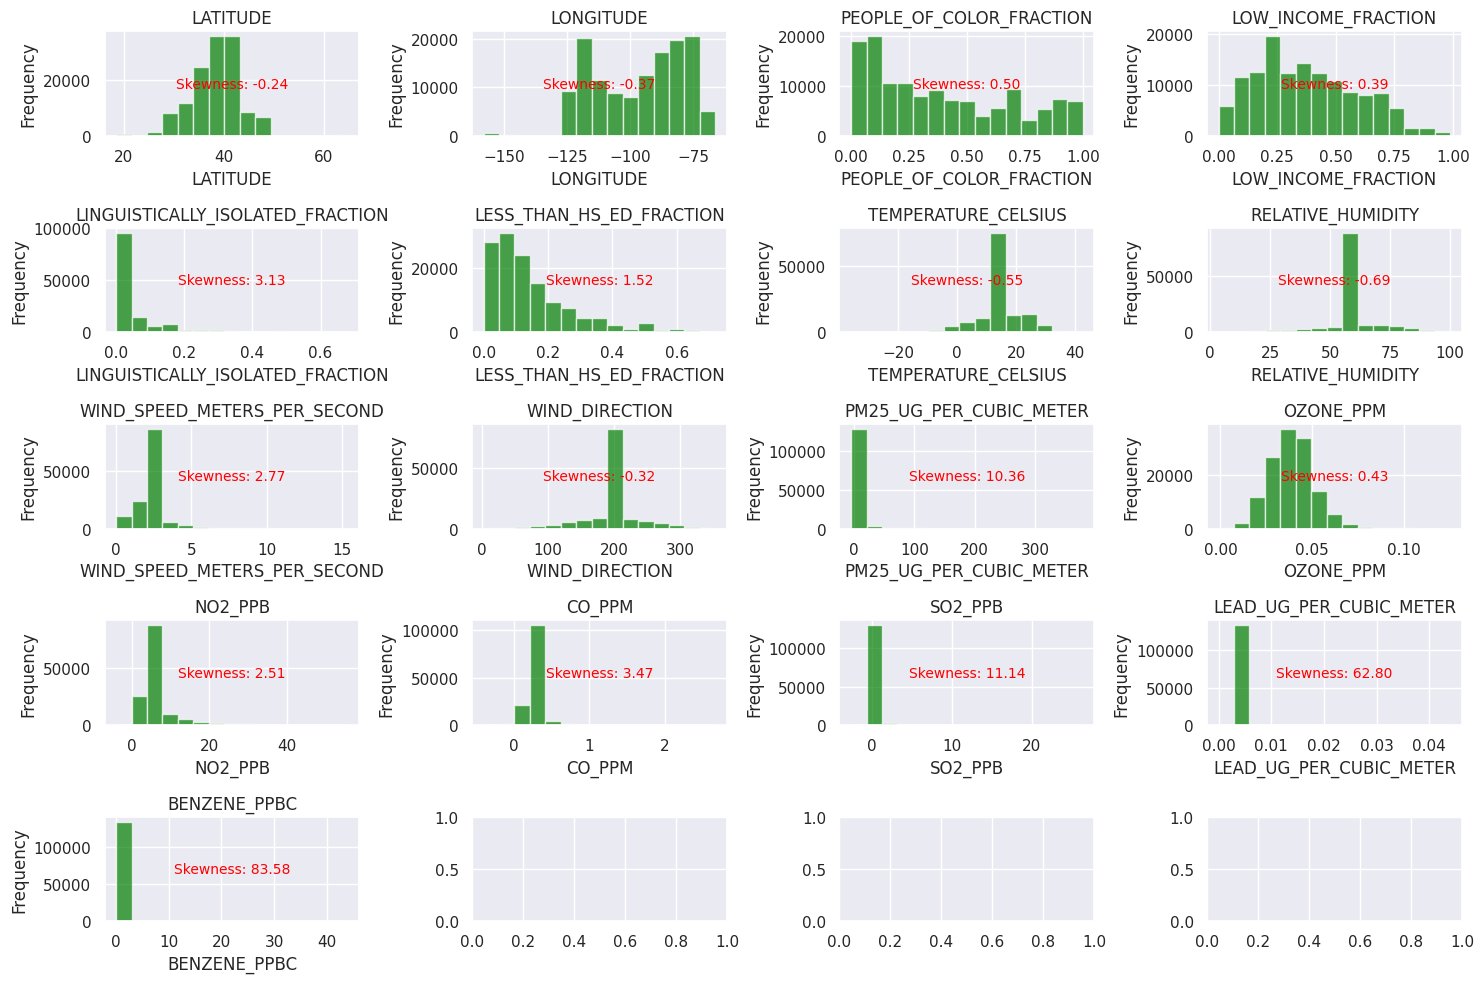

Skewness:
LATITUDE                            -0.238675
LONGITUDE                           -0.368437
PEOPLE_OF_COLOR_FRACTION             0.503337
LOW_INCOME_FRACTION                  0.389933
LINGUISTICALLY_ISOLATED_FRACTION     3.126584
LESS_THAN_HS_ED_FRACTION             1.523448
TEMPERATURE_CELSIUS                 -0.554283
RELATIVE_HUMIDITY                   -0.688218
WIND_SPEED_METERS_PER_SECOND         2.772090
WIND_DIRECTION                      -0.315703
PM25_UG_PER_CUBIC_METER             10.356391
OZONE_PPM                            0.428942
NO2_PPB                              2.513237
CO_PPM                               3.472821
SO2_PPB                             11.144244
LEAD_UG_PER_CUBIC_METER             62.800248
BENZENE_PPBC                        83.579429
dtype: float64


In [24]:
# Calculate skewness for numerical columns
skewness = df.select_dtypes(include=['int64', 'float64']).skew()

# Count the number of numerical columns
num_cols_count = len(df.select_dtypes(include=['int64', 'float64']).columns)

# Determine the layout for subplots
num_rows = (num_cols_count + 3) // 4  # Adjust the number of columns in each row
num_cols = min(4, num_cols_count)  # Maximum of 4 columns in each row

# Plot histograms for numerical columns to visualize distributions and identify anomalies
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i in range(num_rows):
    for j in range(num_cols):
        col_idx = i * num_cols + j
        if col_idx < num_cols_count:
            col = df.select_dtypes(include=['int64', 'float64']).columns[col_idx]
            axes[i, j].hist(df[col], bins=15, color='green', alpha=0.7)
            axes[i, j].set_title(f'{col}')
            axes[i, j].set_xlabel(col)
            axes[i, j].set_ylabel('Frequency')
            
            # Compute skewness
            skew_val = skewness[col]
            
            # Plot skewness value in the center of plot
            axes[i, j].text(0.5, 0.5, f'Skewness: {skew_val:.2f}', horizontalalignment='center',
                            verticalalignment='center', transform=axes[i, j].transAxes, fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Print skewness values
print("Skewness:")
print(skewness)

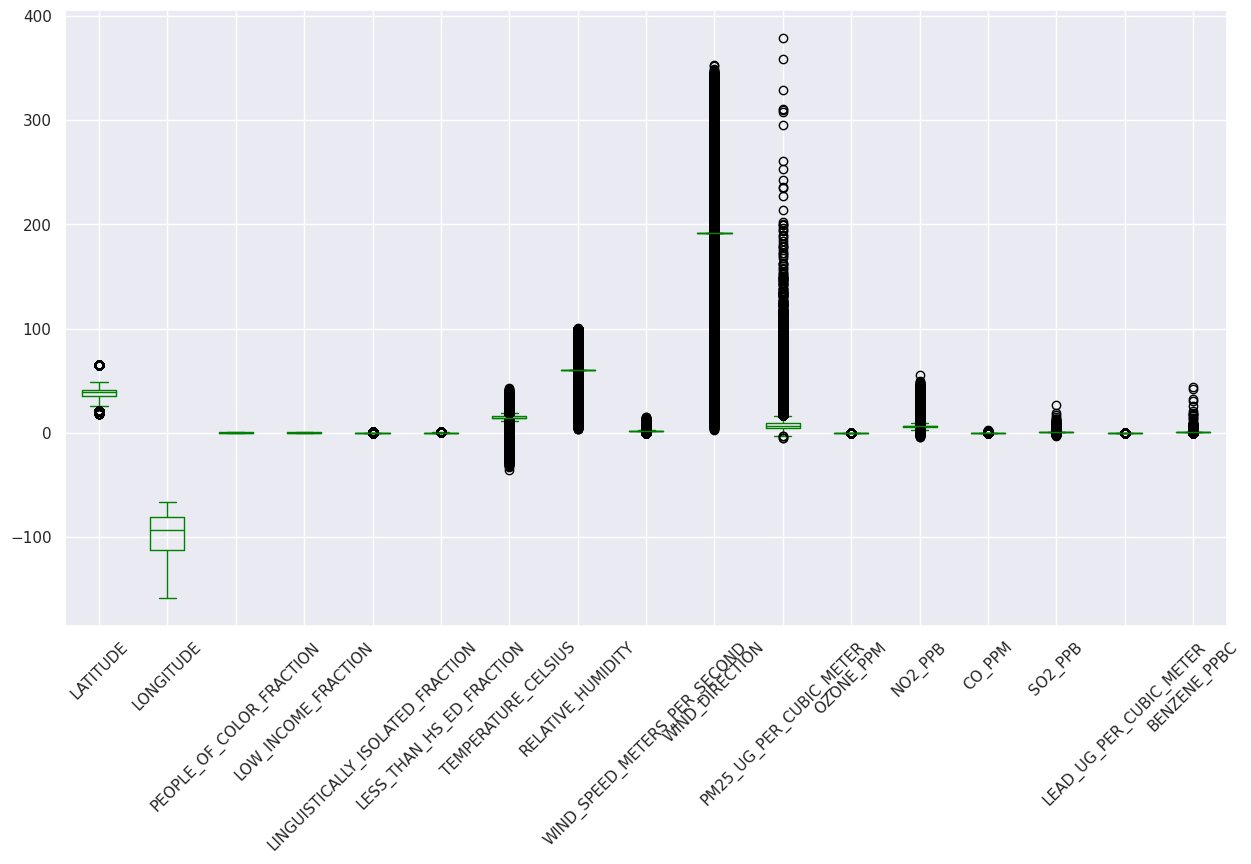

In [25]:
# Plot the boxplot with rotated text labels
df.plot(kind='box', rot=45,color='green')

# Show the plot
plt.show()

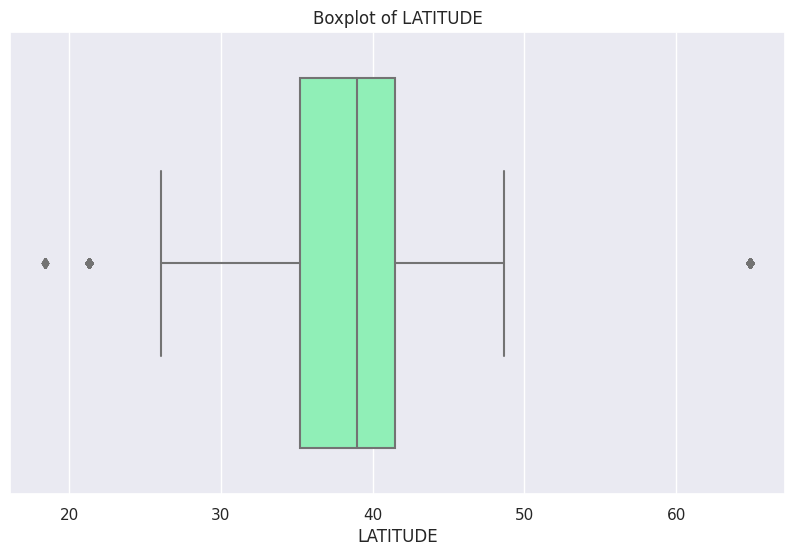

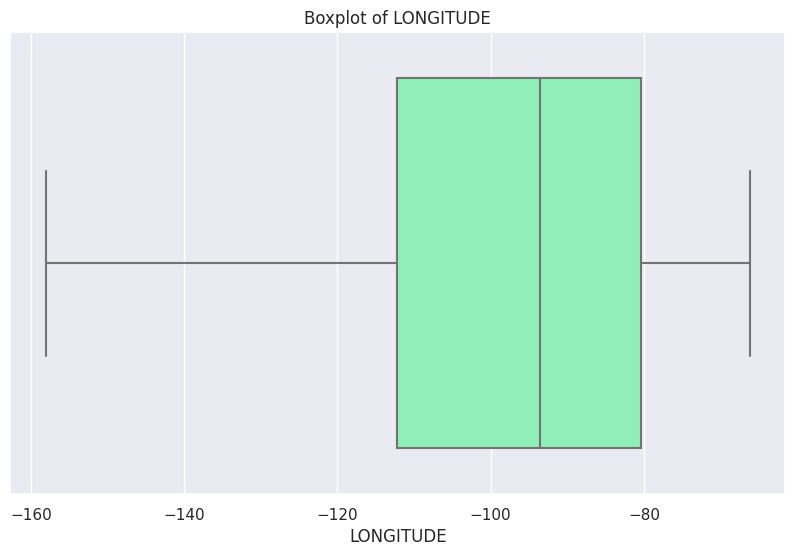

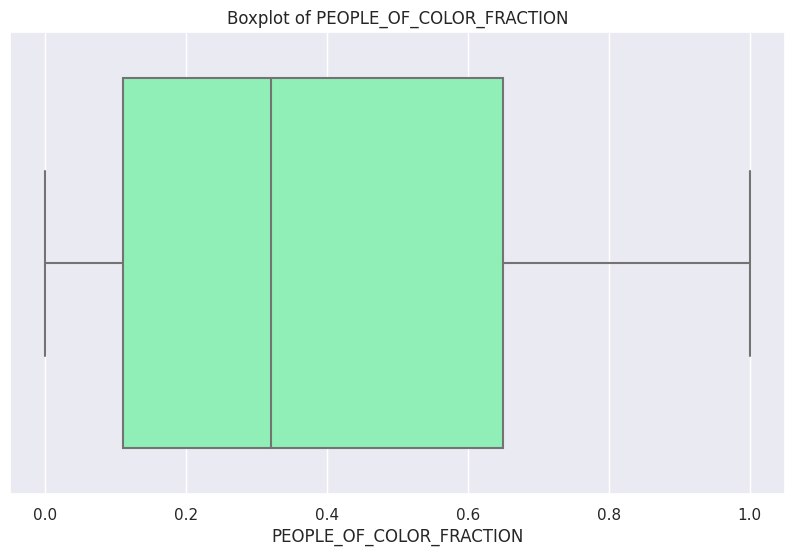

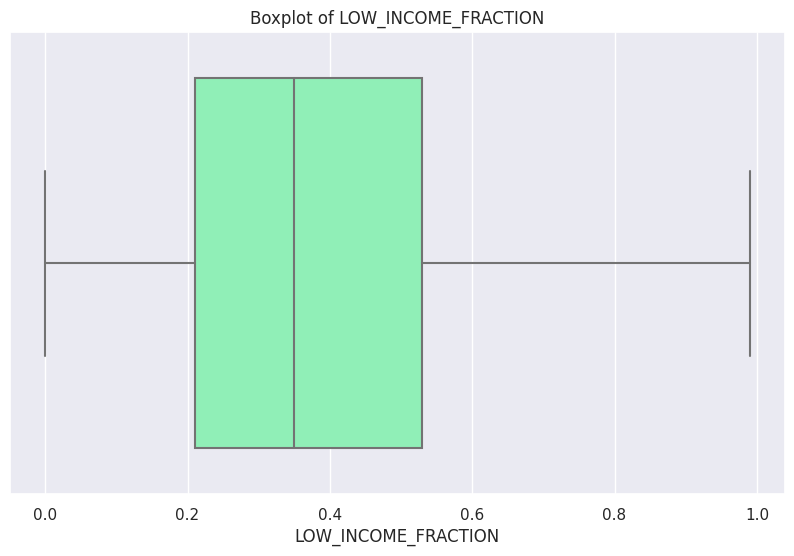

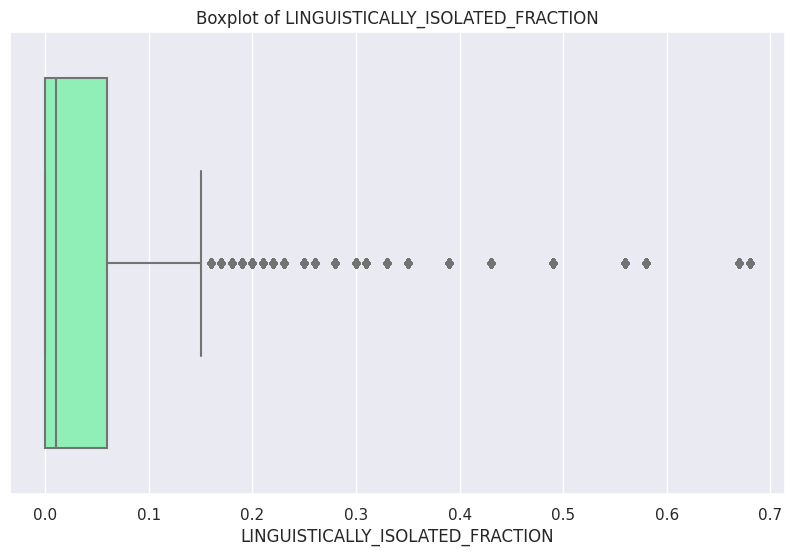

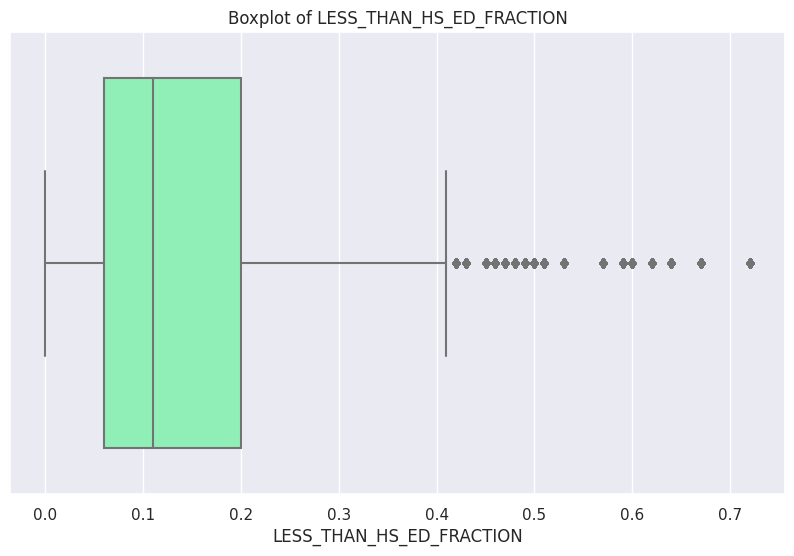

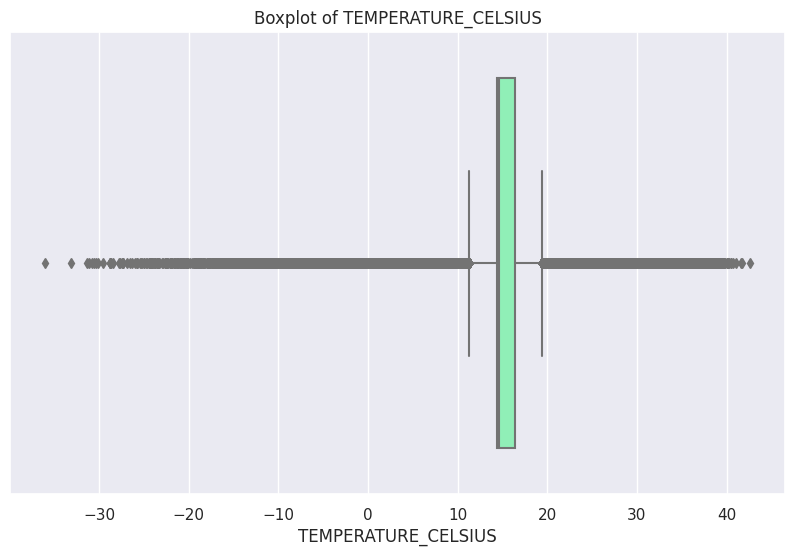

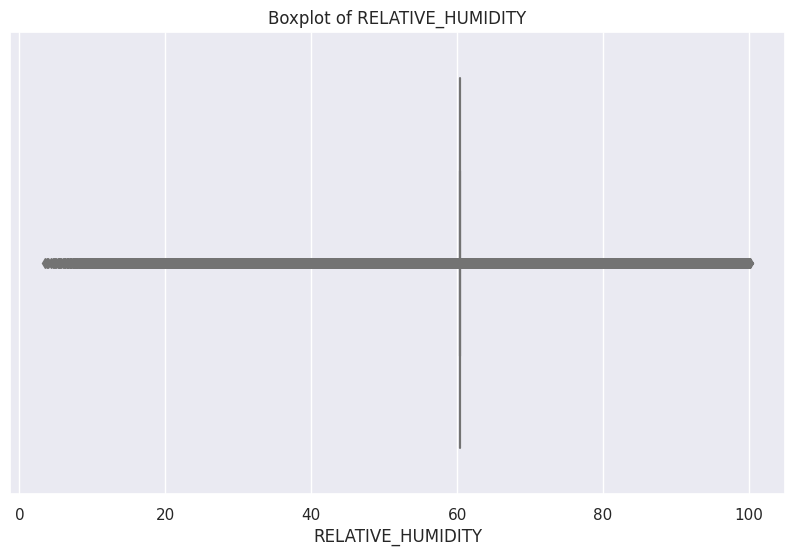

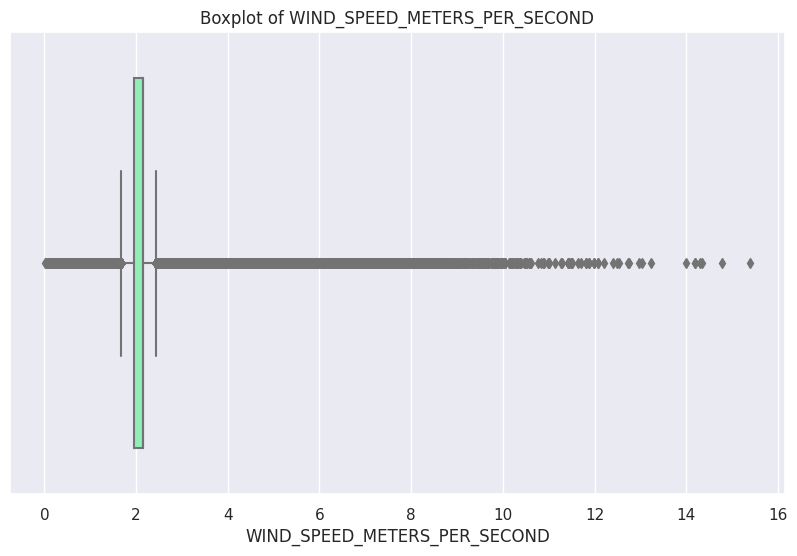

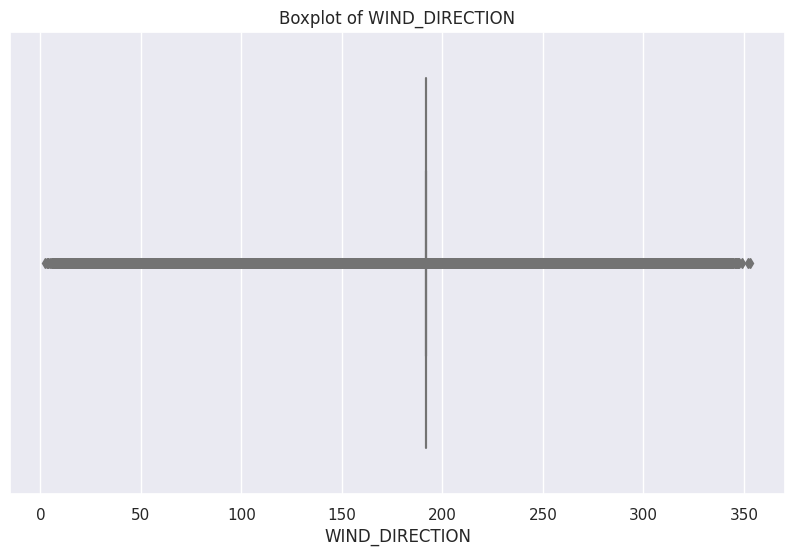

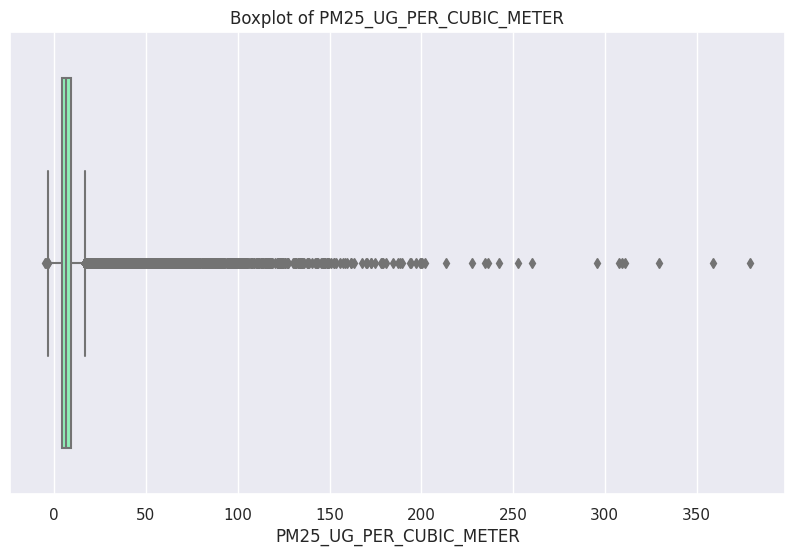

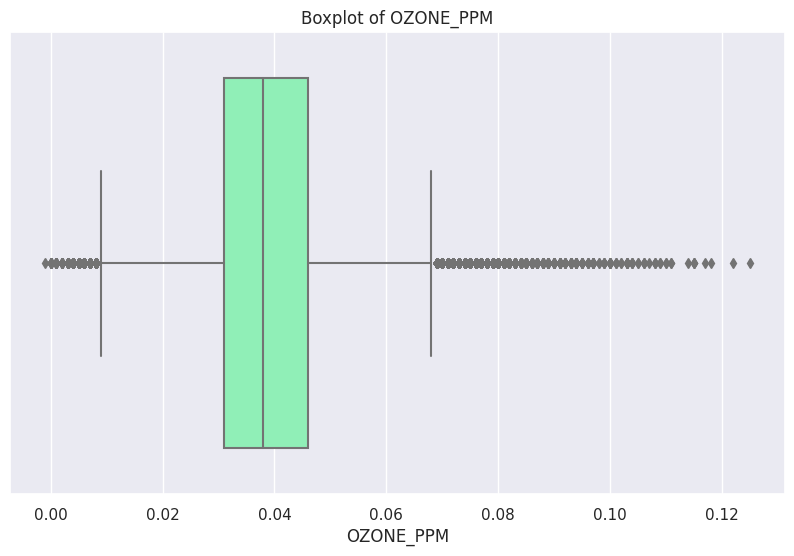

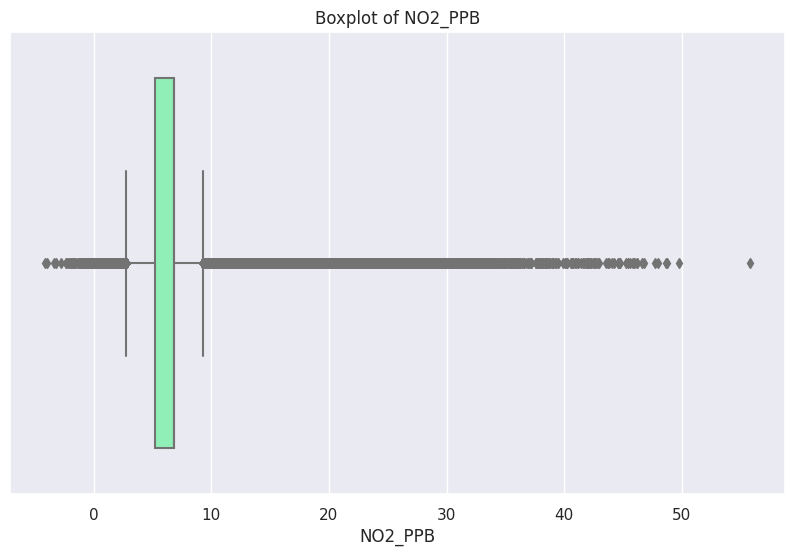

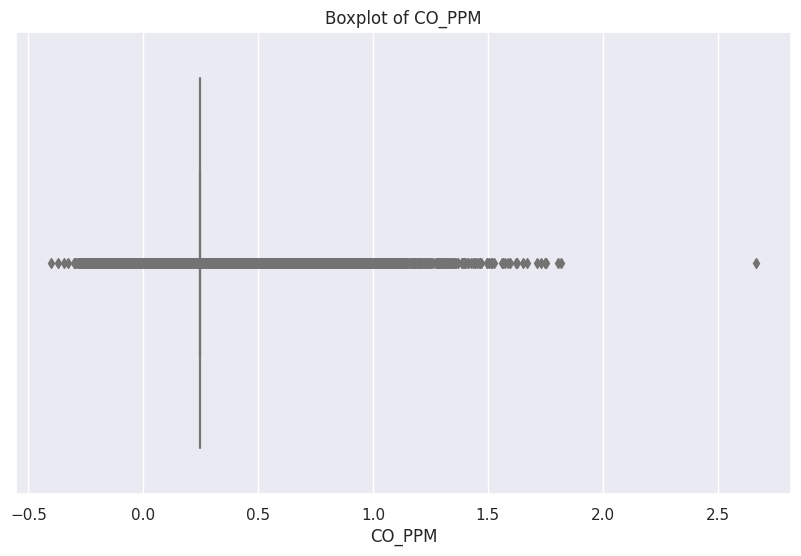

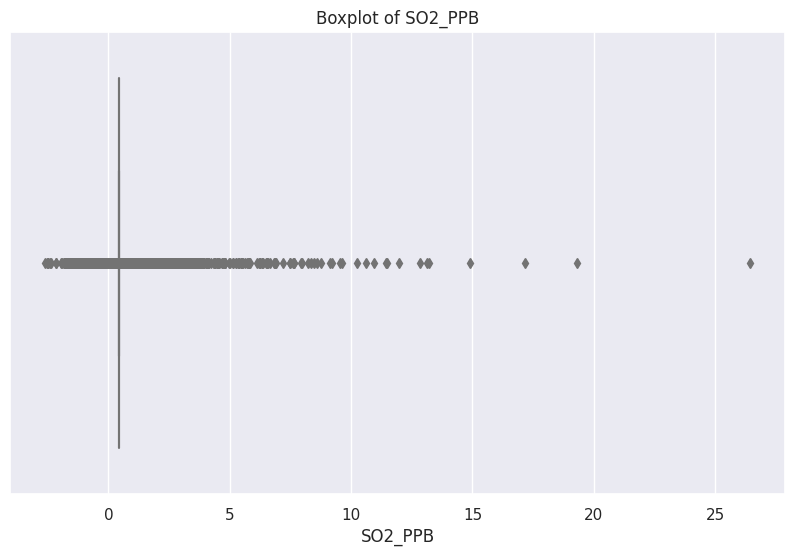

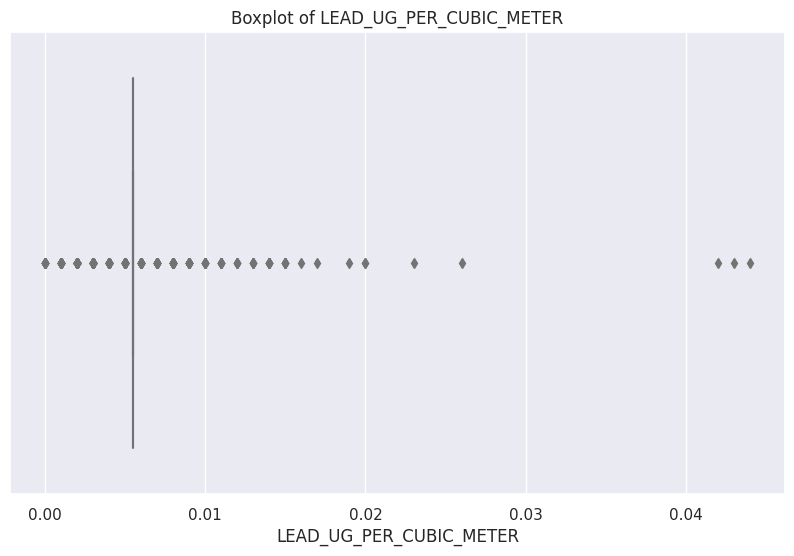

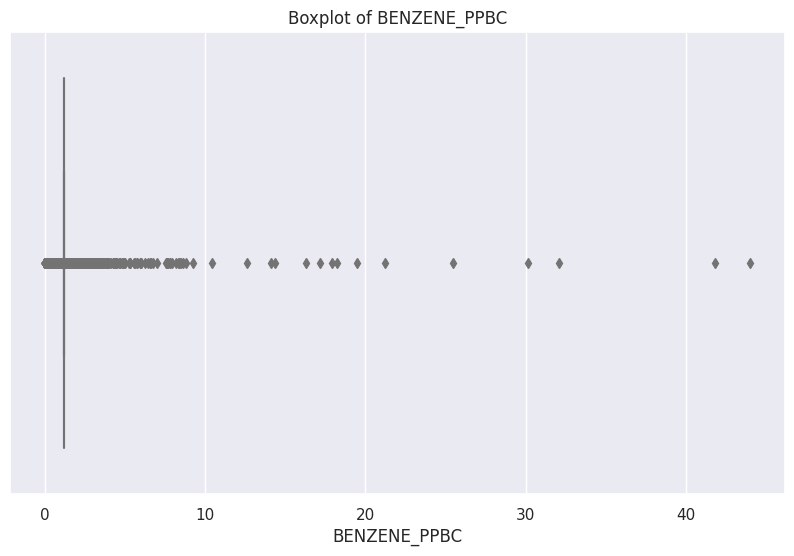

In [26]:
# Filter numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for each numerical feature to identify outliers
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column],palette='rainbow')
    plt.title(f'Boxplot of {column}')
    plt.show()

## Multivariate Analysis

Text(0.5, 1.0, 'Correlation Matrix')

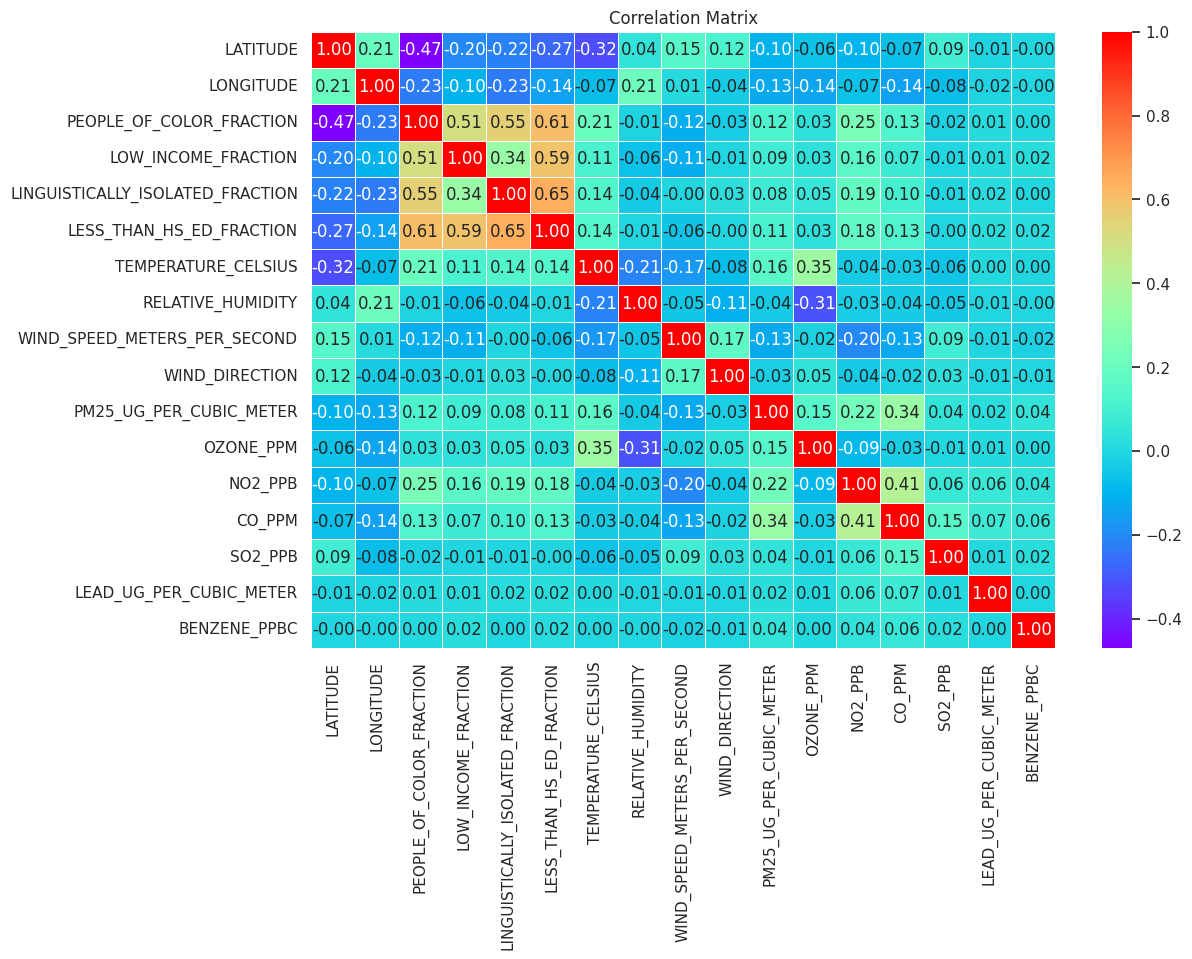

In [27]:
# Correlation matrix

# Select only the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

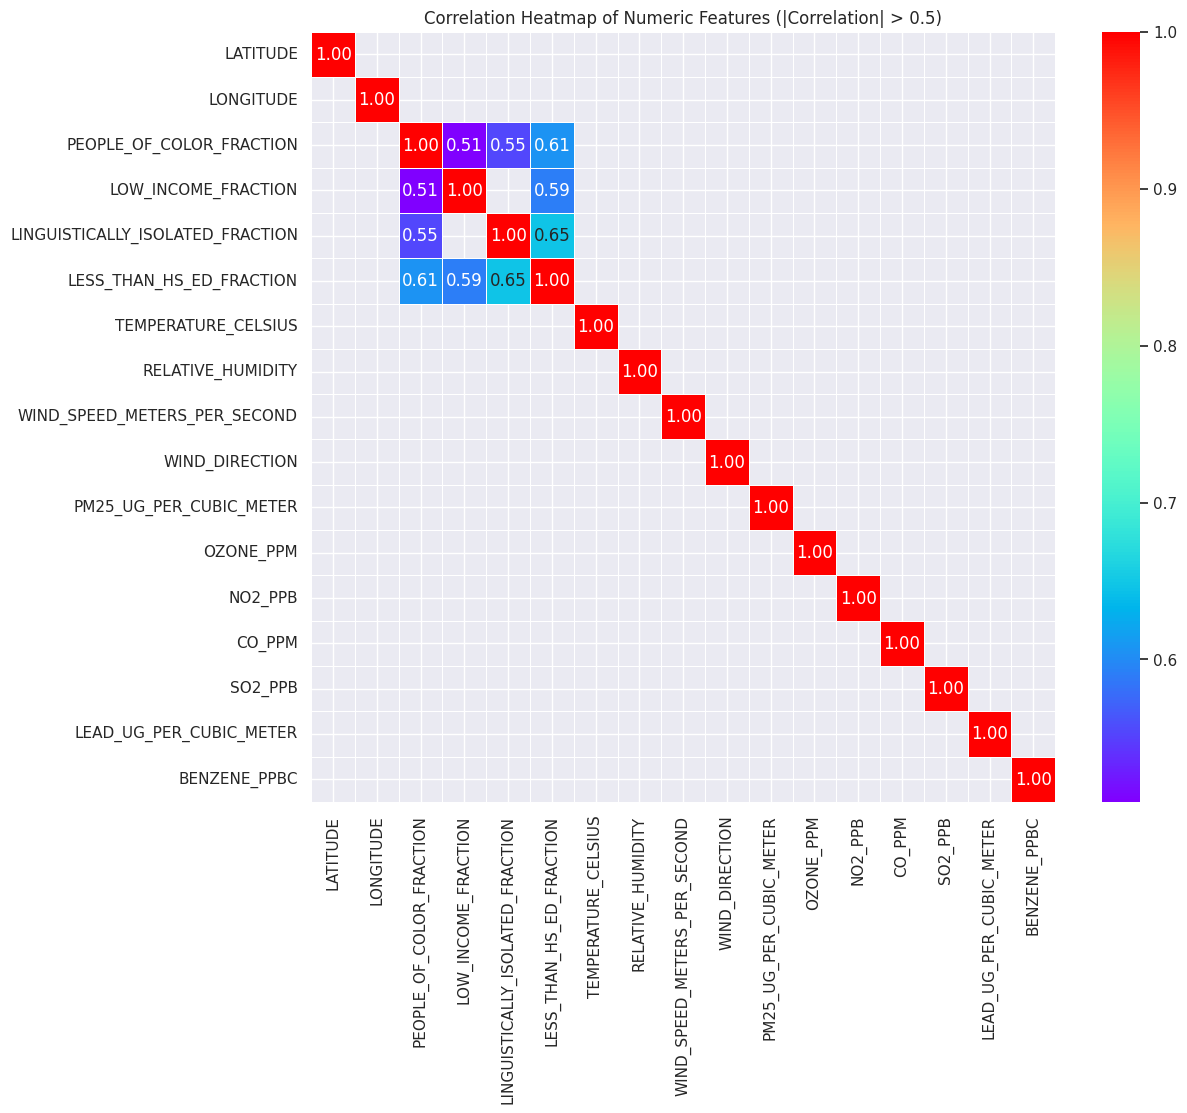

In [28]:
# Heatmap Plotting
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Filter correlation matrix to include values greater than 0.5 or less than -0.5
corr_matrix_filtered = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

# Plot the heatmap with filtered correlation values
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features (|Correlation| > 0.5)')
plt.show()

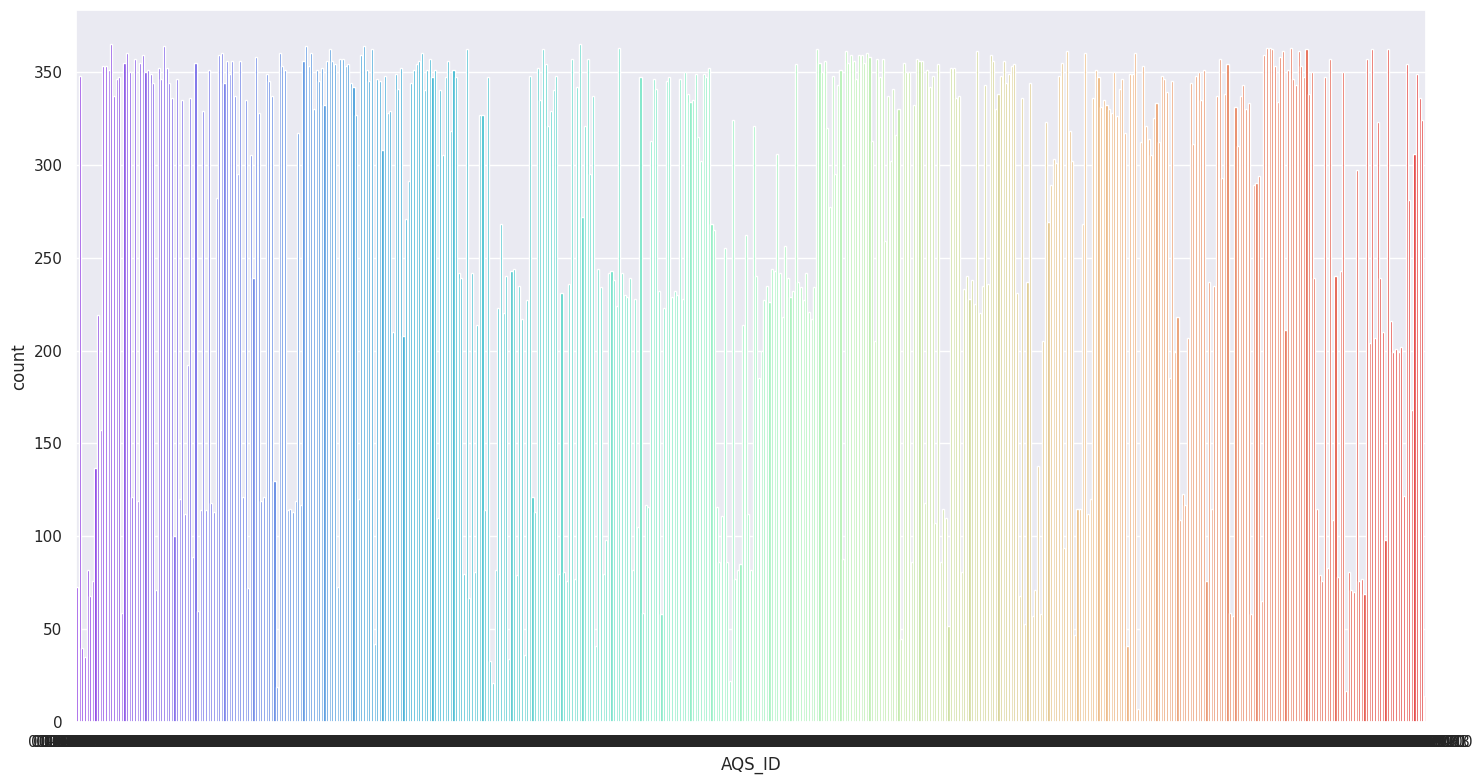

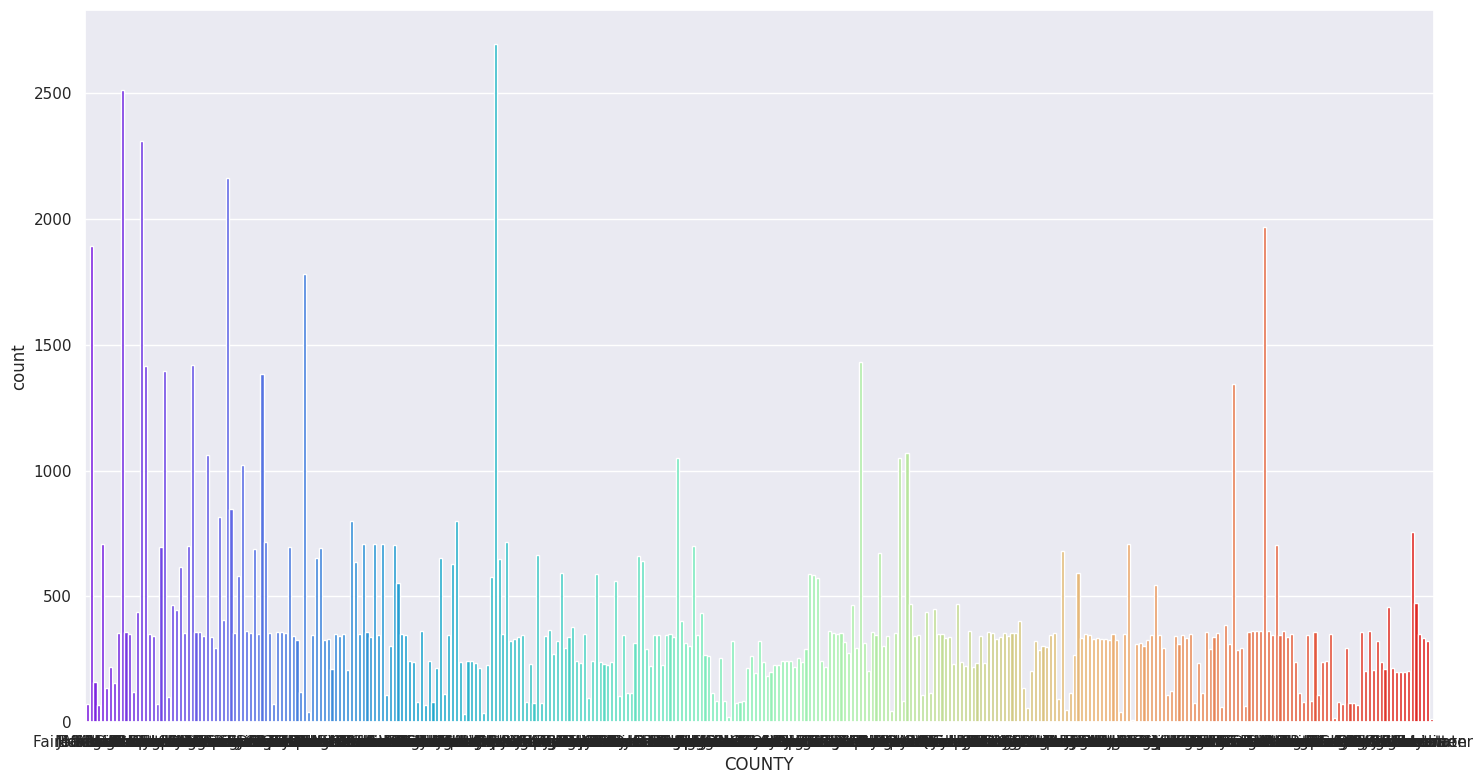

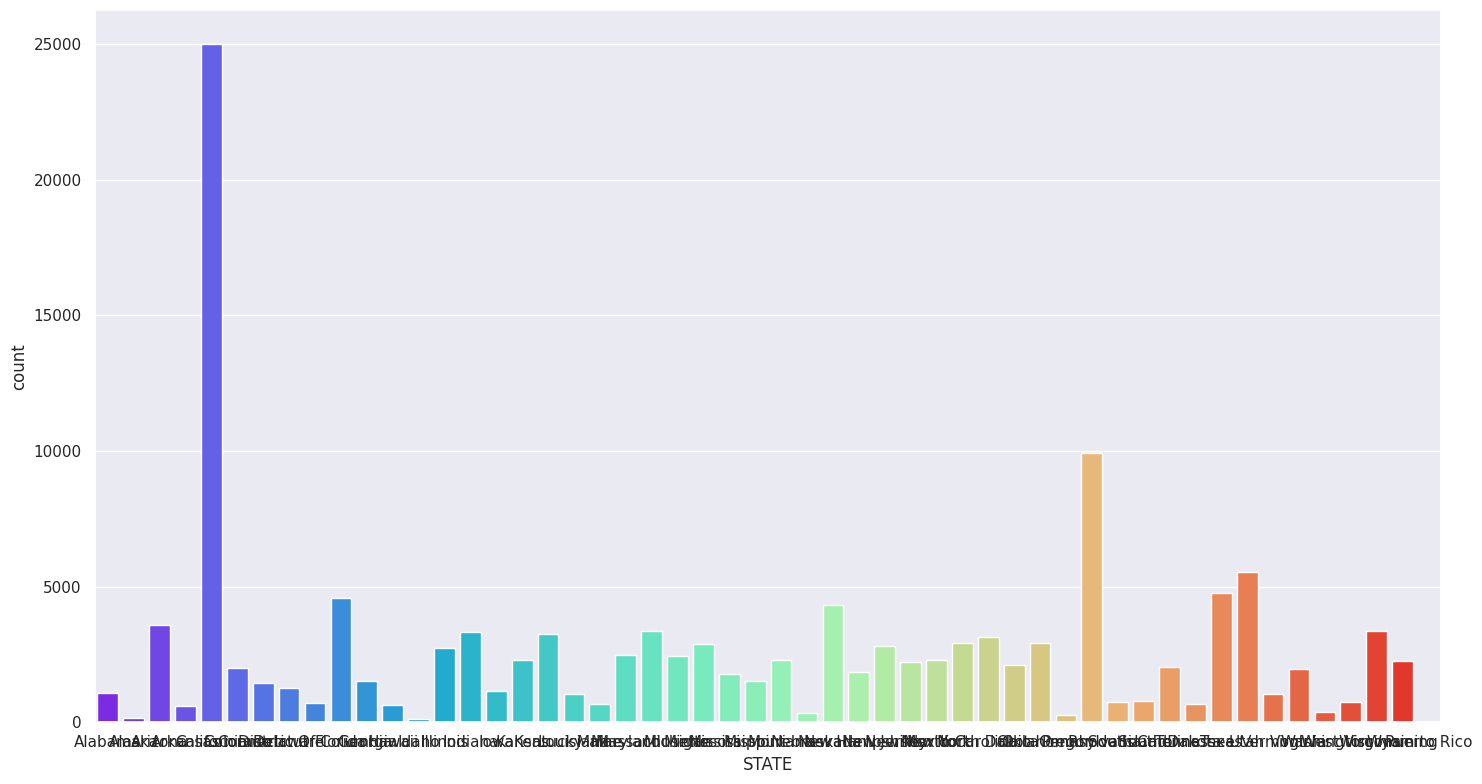

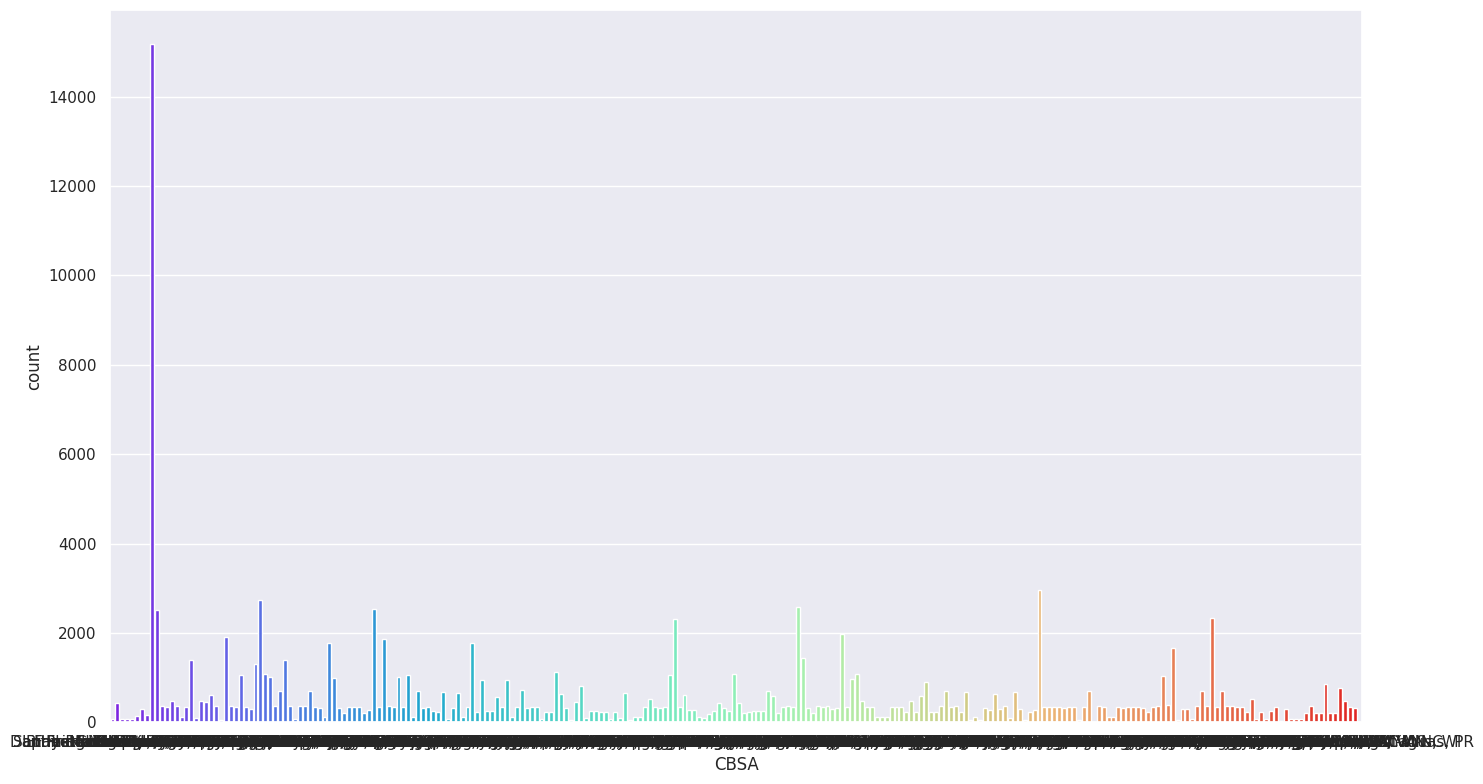

In [29]:
# Explore categorical features
for column in df.select_dtypes(include=['object']):
    sns.countplot(x=column, data=df,palette='rainbow')
    plt.tight_layout()
    plt.show()

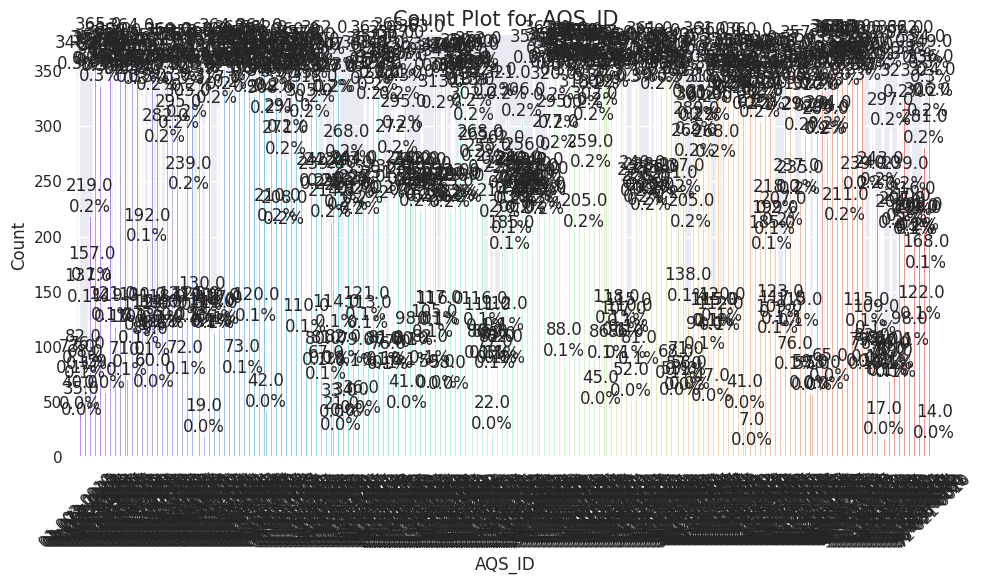

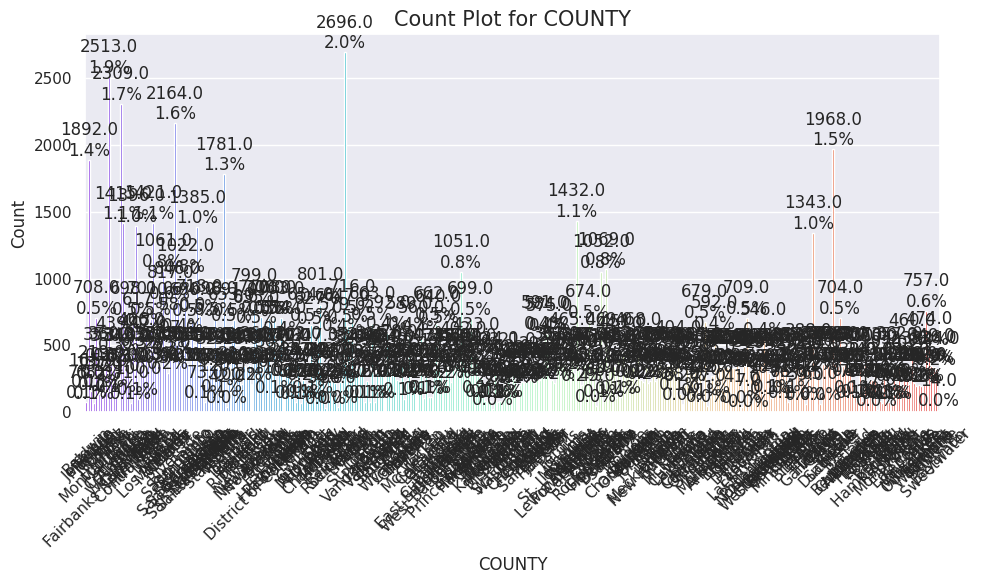

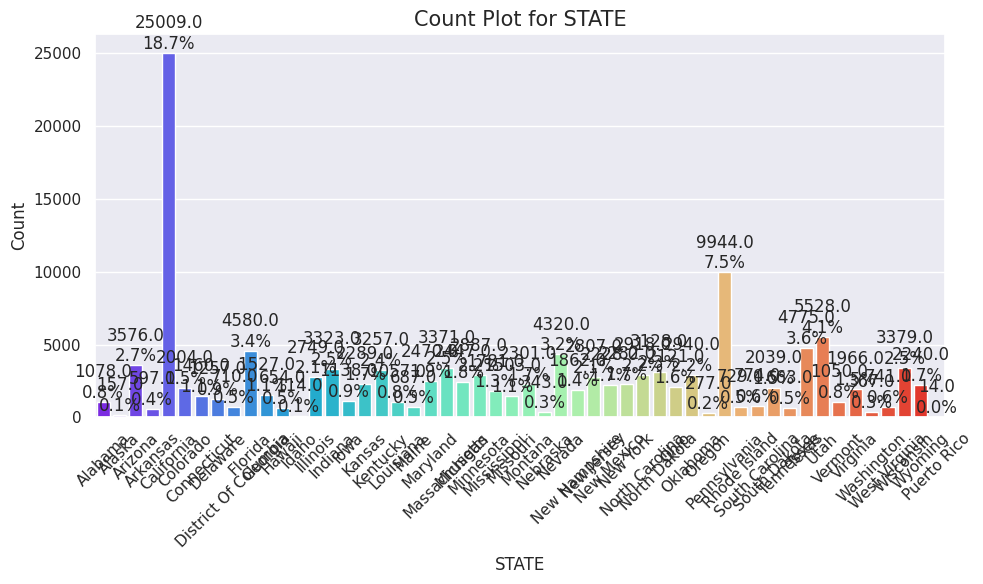

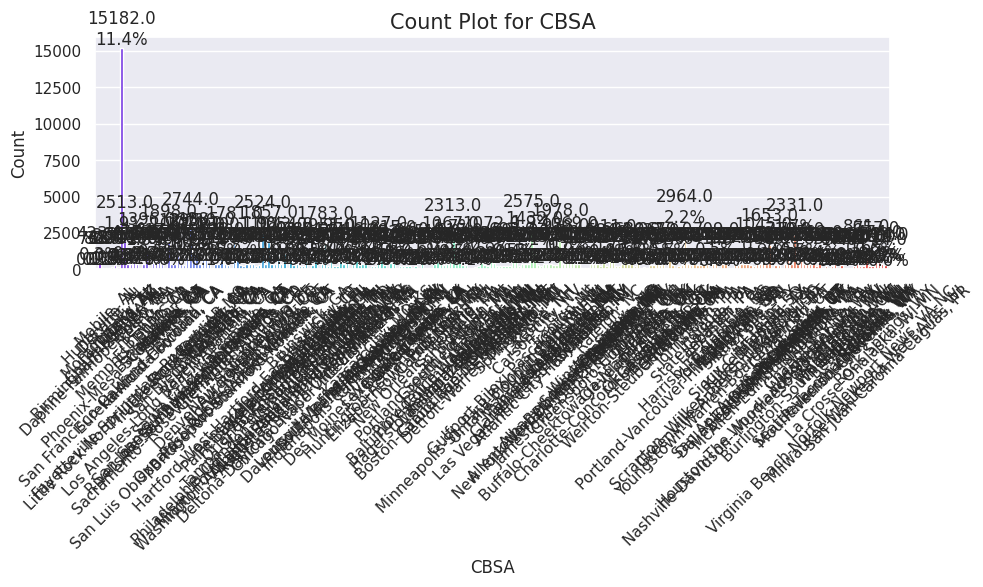

In [30]:
# Explore categorical features
for column in df.select_dtypes(include=['object']):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, data=df,palette='rainbow')
    
    # Add count and percentage annotations to each bar
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n{percentage}', (x, y), ha='center', va='bottom')
    
    plt.title(f'Count Plot for {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()